In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
! kaggle datasets download -d omkargurav/face-mask-dataset --force

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:03<00:00, 68.2MB/s]
100% 163M/163M [00:03<00:00, 55.2MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
! ls

data  face-mask-dataset.zip  sample_data


In [6]:
# Importing the Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

Brief Analysis on Dataset folders

In [7]:
with_file_masks = os.listdir('/content/data/with_mask')
print(with_file_masks[0:5])
print(with_file_masks[-5:])

['with_mask_2263.jpg', 'with_mask_2885.jpg', 'with_mask_47.jpg', 'with_mask_2107.jpg', 'with_mask_329.jpg']
['with_mask_2387.jpg', 'with_mask_2590.jpg', 'with_mask_167.jpg', 'with_mask_2669.jpg', 'with_mask_3094.jpg']


In [8]:
without_file_masks = os.listdir('/content/data/without_mask')
print(without_file_masks[0:5])
print(without_file_masks[-5:])

['without_mask_787.jpg', 'without_mask_2723.jpg', 'without_mask_3578.jpg', 'without_mask_688.jpg', 'without_mask_1561.jpg']
['without_mask_988.jpg', 'without_mask_2840.jpg', 'without_mask_2978.jpg', 'without_mask_2374.jpg', 'without_mask_3824.jpg']


In [9]:
print("Number of masked images :", len(with_file_masks))
print("Number of non-masked images :", len(without_file_masks))

Number of masked images : 3725
Number of non-masked images : 3828


Labels Creation for 2 class of images

with mask -> 1
 ;  without mask -> 0

In [10]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
# Double checking the length
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the image(s)

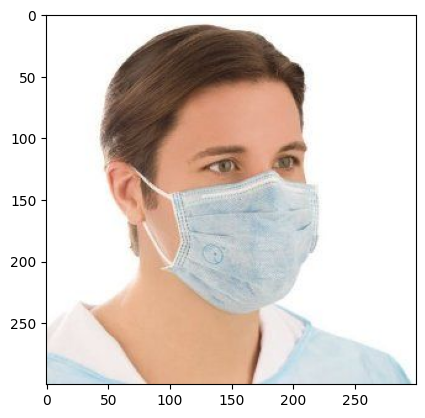

In [14]:
# Displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3217.jpg')
imgplot = plt.imshow(img)
plt.show()

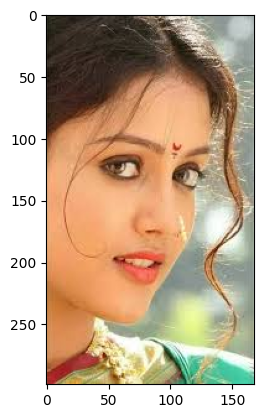

In [15]:
# Displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1559.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1.) Resize the images

2.) Convert images into numpy arrays

In [16]:
# Converting masked images into numpy arrays

file_path = '/content/data/with_mask/'

data = []

for file in with_file_masks:
  image = Image.open(file_path + file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


# Converting non - masked images into numpy arrays

file_path_without = '/content/data/without_mask/'

for file in without_file_masks:
  image = Image.open(file_path_without + file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
print(len(data))
type(data)

7553


list

In [18]:
print(data[0])

[[[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[224 199 187]
  [164 131 118]
  [183 142 127]
  ...
  [229 189 167]
  [220 180 158]
  [211 171 149]]

 [[181 146 131]
  [174 135 120]
  [186 141 123]
  ...
  [228 191 170]
  [219 181 160]
  [210 172 151]]

 [[167 129 113]
  [176 134 117]
  [188 142 123]
  ...
  [228 192 170]
  [219 183 161]
  [210 174 152]]]


In [19]:
print(data[0].shape)

(128, 128, 3)


In [20]:
# Converting image list ('data' list) and labels ('labels' list) into numpy arrays

x = np.array(data)
y = np.array(labels)

In [21]:
print(type(x), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [22]:
print(x.shape, y.shape)

(7553, 128, 128, 3) (7553,)


In [23]:
print(y)

[1 1 1 ... 0 0 0]


Train Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# Scaling the data
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [27]:
x_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

**Building the Convolutional Neural Network**

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes = 2

# Alternative method to stack up layers in the Neural Network
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

# Below layer will allow the model to accept the input as a form of Vector(1D array), rather than a Matrix
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))

# Below layer is added, so that we do not face any Overfitting issues
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [30]:
# Compile the Neural Network
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

Training the Neural Network

In [31]:
history = model.fit(x_train_scaled, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.4750 - acc: 0.7901 - val_loss: 0.3430 - val_acc: 0.8529
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.3101 - acc: 0.8817 - val_loss: 0.3168 - val_acc: 0.8645
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2536 - acc: 0.8937 - val_loss: 0.2491 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2178 - acc: 0.9182 - val_loss: 0.2383 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1795 - acc: 0.9279 - val_loss: 0.2019 - val_acc: 0.9322


Model Evaluation

In [33]:
loss , acc = model.evaluate(x_test_scaled, y_test)
print("Test data accuracy : ", acc)

48/48 [==============================] - 1s 13ms/step - loss: 0.1801 - acc: 0.9318
Test data accuracy :  0.9318332076072693


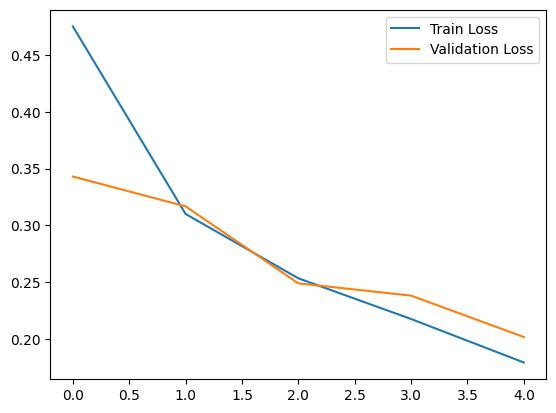

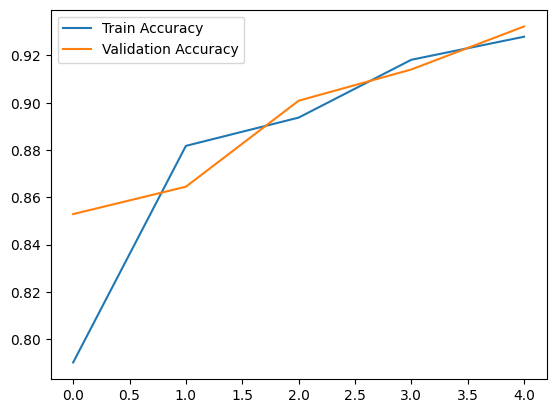

In [35]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label = 'Train Loss')
plt.plot(h.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['acc'], label = 'Train Accuracy')
plt.plot(h.history['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.show()

Predictive System

Path of image to be predicted/content/data/without_mask/without_mask_1559.jpg


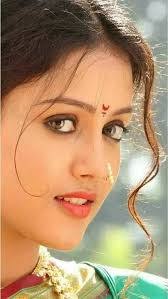

1/1 [==============================] - 0s 22ms/step
[[0.2274778 0.8791599]]
1
Person is not wearing the mask


In [45]:
input_image_path = input("Path of image to be predicted")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize / 255

input_image_reshape = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshape)

print(input_prediction)

input_image_label = np.argmax(input_prediction)

print(input_image_label)

if input_image_label == 0:
  print("Person is wearing the mask")
else :
  print("Person is not wearing the mask")

**Thank You**